# Import

In [1]:
import torch
import torchvision

from glcic.networks.completion_network import CompletionNetwork
from glcic.networks.discriminators import Discriminator
from glcic.trainers.conjugate_trainer import train
from glcic.utils import *

# Prepare

In [ ]:
# load the dataset
train_dataset_dir = '../data/train/'
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_dir, transform=torchvision.transforms.ToTensor())
train_dataloader = get_dataloader(train_dataset_dir, train_dataset_dir+"barn/00001008.jpg", batch_size=48)

In [2]:
# others
cn = CompletionNetwork().cuda()
cn.load('../logs/models/cn_scrapped_weights')
cn_optimizer = torch.optim.Adadelta(cn.parameters())

discriminator = Discriminator().cuda()
discriminator_optimizer = torch.optim.Adadelta(discriminator.parameters())
_ = load_checkpoint("../logs/phase2_checkpoints/",discriminator, discriminator_optimizer)
discriminator_optimizer = torch.optim.Adadelta(discriminator.parameters()) # reset

num_batch = 10
replacement_val = torch.tensor([0.5062325495504219, 0.4255871700324652, 0.38299278586700136])

Load: load_state dict from ../logs/models/cn_scrapped_weights


# Test

In [ ]:
# conjugate training
loss = train(
    cn,
    discriminator,
    cn_optimizer,
    discriminator_optimizer,
    train_dataloader,
    num_batch,
    replacement_val,
    )


### BATCH 1/10 ###


loss: 1263.168701171875 for the completion loss, 0.0005955014494247735 for the discriminator loss

### BATCH 2/10 ###
loss: 4480.0390625 for the completion loss, 0.004382789134979248 for the discriminator loss

### BATCH 3/10 ###
loss: 3823.199951171875 for the completion loss, 0.009200291708111763 for the discriminator loss

### BATCH 4/10 ###
loss: 2795.878662109375 for the completion loss, 0.001937978551723063 for the discriminator loss

### BATCH 5/10 ###
loss: 2836.083251953125 for the completion loss, 6.31926247440795e-11 for the discriminator loss

### BATCH 6/10 ###
loss: 2298.863525390625 for the completion loss, 0.0009300136589445174 for the discriminator loss

### BATCH 7/10 ###
loss: 2290.740478515625 for the completion loss, 7.273118218797947e-10 for the discriminator loss

### BATCH 8/10 ###
loss: 2048.144287109375 for the completion loss, 9.408774204189285e-09 for the discriminator loss

### BATCH 9/10 ###
loss: 2269.806396484375 for the completion loss, 1.08924758102091

In [ ]:
# results
resume_path = "../data/train/barn/00001008.jpg"

save_conjugate_checkpoint(
    "../logs/phase3_checkpoints/",
    [cn,discriminator],
    [cn_optimizer, discriminator_optimizer],
    [loss],
    10,
    resume_path,
    replacement_val
)

# Monitor the training

In [3]:
# load
loss,num_batch,resume_path,replacement_val = load_conjugate_checkpoint(
    "../logs/phase3_checkpoints/",
    [cn,discriminator],
    [cn_optimizer,discriminator_optimizer]
)

In [4]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

Text(0, 0.5, 'discriminator loss')

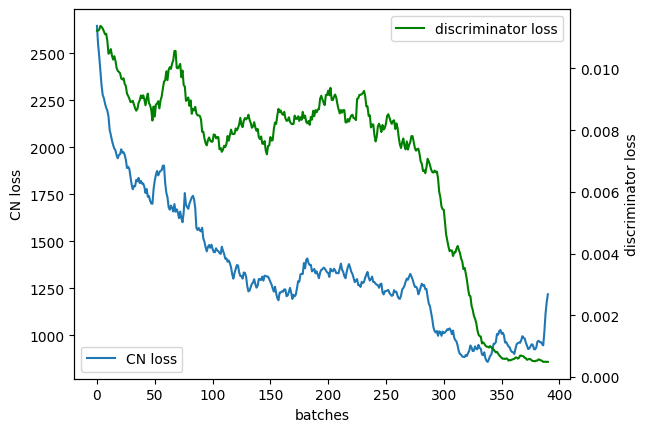

In [24]:
# losses
import matplotlib.pyplot as plt
loss_concat = []
for loss_list in loss:
    loss_concat += loss_list
cn_loss,discriminator_loss = zip(*loss_concat[10:])
plt.plot(smooth(cn_loss,10),label="CN loss")
ax0 = plt.gca()
ax1 = ax0.twinx()
ax1.plot(smooth(discriminator_loss,10),c='g',label="discriminator loss")
ax0.legend(loc="lower left")
ax1.legend()

ax0.set_xlabel("batches")
ax0.set_ylabel("CN loss")
ax1.set_ylabel("discriminator loss")